# Day 3: Crossed Wires

https://adventofcode.com/2019/day/3

## Setup

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [2]:
plt.rc('figure', facecolor='w', dpi=100)

In [3]:
paths = list(map(str.strip, open('input/03.txt').readlines()))

## Implementation

In [4]:
def parse_dirs_dists(path):
    dirs, dists = [], []
    for item in path.split(','):
        dir, dist = item[0], int(item[1:])
        dirs.append(dir), dists.append(dist)
    return np.array(dirs), np.array(dists)

def trace_path(dirs, dists):
    x, y = 0, 0
    xs, ys = [x], [y]
    fx = dict(L=-1, R=1, U=0, D=0)
    fy = dict(L=0, R=0, U=1, D=-1)
    for (dir, dist) in zip(dirs, dists):
        for i in range(dist):
            x += fx[dir]
            y += fy[dir]
            xs.append(x)
            ys.append(y)
    return np.array(xs), np.array(ys)

def get_intersections(x1, y1, x2, y2):
    p1 = set(list(zip(x1, y1)))
    p2 = set(list(zip(x2, y2)))
    return np.transpose(list(p1 & p2))

def manhattan(x, y, x0=0, y0=0):
    return np.abs(x - x0) + np.abs(y - y0)

def time_distance(X, Y, x1, y1, x2, y2):
    t1 = np.where((x1 == X) & (y1 == Y))[0][0]
    t2 = np.where((x2 == X) & (y2 == Y))[0][0]
    return t1 + t2

In [5]:
x1, y1 = trace_path(*parse_dirs_dists(paths[0]))
x2, y2 = trace_path(*parse_dirs_dists(paths[1]))
xint, yint = get_intersections(x1, y1, x2, y2)

## Tests

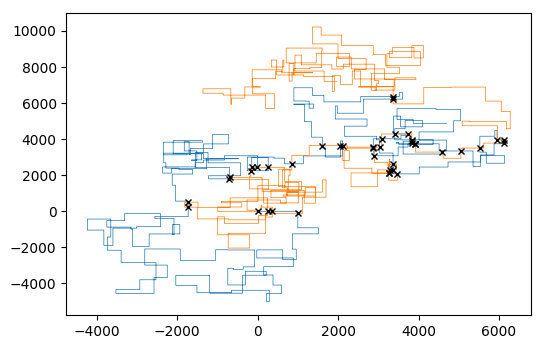

In [6]:
plt.plot(x1, y1, lw=.5)
plt.plot(x2, y2, lw=.5)
plt.plot(xint, yint, 'x', color='k', ms=5)

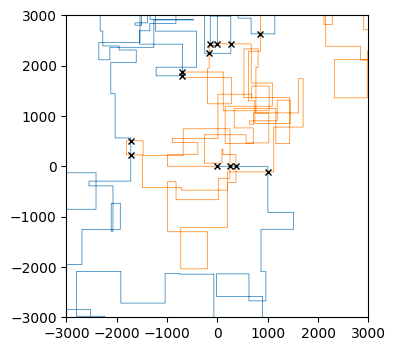

In [7]:
plt.plot(x1, y1, lw=.5)
plt.plot(x2, y2, lw=.5)
plt.xlim(-3e3, 3e3)
plt.ylim(-3e3, 3e3)
plt.plot(xint, yint, 'kx', ms=5)
plt.gca().set_aspect('equal')

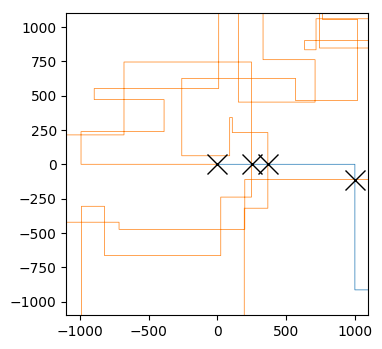

In [8]:
plt.plot(x1, y1, lw=.5)
plt.plot(x2, y2, lw=.5)
plt.plot(xint, yint, 'x', color='k', ms=15)
plt.xlim(-1.1e3, 1.1e3)
plt.ylim(-1.1e3, 1.1e3)
plt.gca().set_aspect('equal')

## Part One

In [9]:
dists = manhattan(xint, yint)
print(dists)
np.sort(dists)[1]

[ 2510  5371  7098   367  6429  1112  3483 10082  6371  9905  7603  2697
  6588  9024  9725  7792  5384  7633  5658  5752  7692  2410  5248  5979
  7873  2228  9583  5698  9932     0  8027  2575  8393  2569  7662  5547
  2435  1948  5969  7716   248  5556]


248

## Part Two

In [10]:
tdists = np.array([time_distance(X, Y, x1, y1, x2, y2) for (X, Y) in zip(xint, yint)])

In [11]:
np.sort(tdists)[1]

28580